<a href="https://colab.research.google.com/github/kumarmanishpradhan/Twitter-Sentiment-Analysis/blob/main/SDP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from transformers import pipeline
import re
import string
from nltk.tokenize import word_tokenize
from collections import defaultdict

# Download stopwords if not already downloaded
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/SDP/Code Folder/IndianElection19TwitterData.csv',index_col=0)
df.head()

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142566 entries, 0 to 142565
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    142566 non-null  object
 1   User    142566 non-null  object
 2   Tweet   142566 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [7]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['Date'],errors='coerce')


In [8]:
df.drop('Date',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142566 entries, 0 to 142565
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   User    142566 non-null  object             
 1   Tweet   142566 non-null  object             
 2   date    142566 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 4.4+ MB


# Data Explorations and Event Extraction by Date

In [10]:
# Find the minimum date
min_date = df['date'].min()

# Calculate the day number by subtracting the minimum date and adding 1
df['day'] = (df['date'] - min_date).dt.days + 1

# Calculate the week number
df['week'] = df['day'].apply(lambda x: (x - 1) // 7 + 1)

In [11]:
df.sort_values(by='day',inplace=True)

In [12]:
# Count tweets per day
tweets_per_day = df.groupby('day')['Tweet'].count()

# Count tweets per week
tweets_per_week = df.groupby('week')['Tweet'].count()


In [13]:
tweets_per_day

day
1       286
2       665
3       537
4       594
5       438
       ... 
134    1156
135    1232
136    1354
137    1480
138    1132
Name: Tweet, Length: 138, dtype: int64

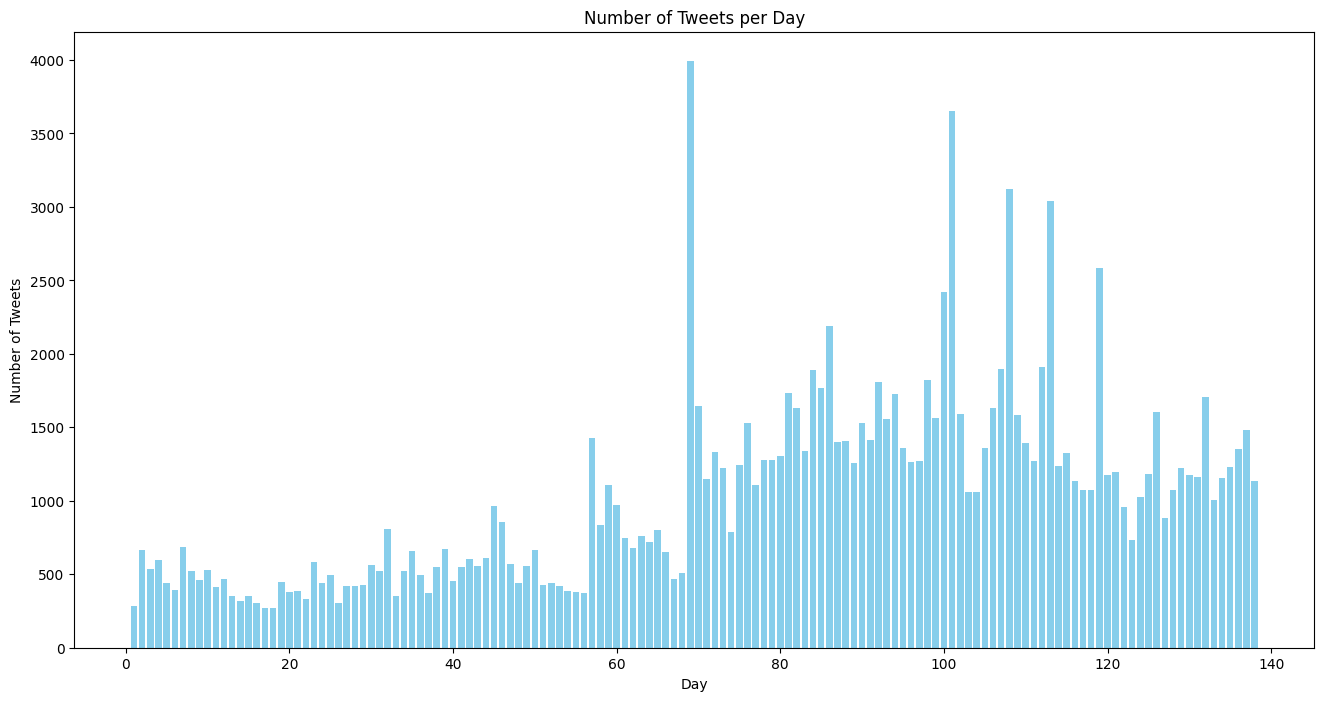

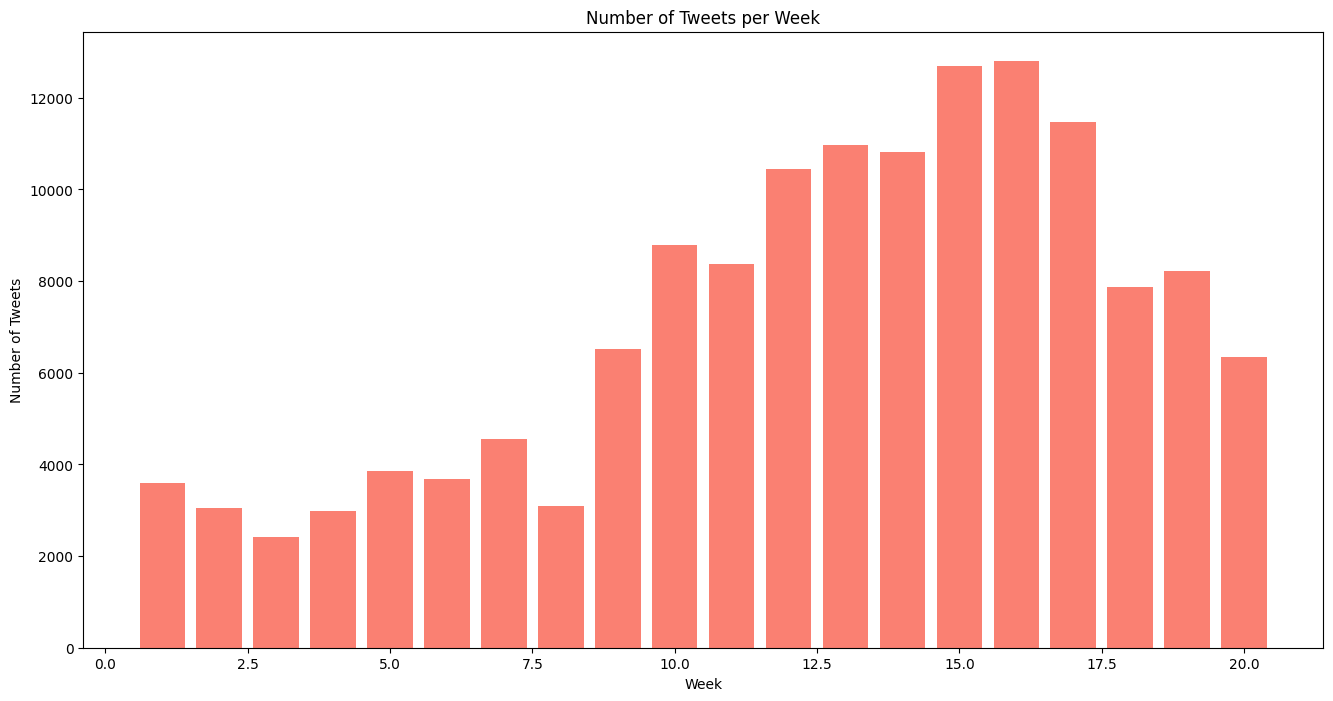

In [53]:
# Plot the number of tweets per day
plt.figure(figsize=(16, 8))
plt.bar(tweets_per_day.index, tweets_per_day.values, color='skyblue')
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')
plt.show()

# Plot the number of tweets per week
plt.figure(figsize=(16, 8))
plt.bar(tweets_per_week.index, tweets_per_week.values, color='salmon')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Week')
plt.show()


## Extracting Two Data Frame with Narendra Modi and Rahul Gandhi

In [15]:
"""
 Filtering out tweets with some keywords and hashtags in it
 referring to Narendra Modi that are commonly used on twitter
    """
#modi
modi_keywords = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]


"""
 Filtering out tweets with some keywords and hashtags in it
 referring to rahul that are commonly used on twitter
    """
#rahul
rahul_keywords = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","#VoteForCongress",
         "#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi","#Rahul"]



# Create a boolean mask for BJP tweets
modi_mask = df['Tweet'].str.contains('|'.join(modi_keywords), case=False, na=False)

# Create a boolean mask for Congress tweets
rahul_mask = df['Tweet'].str.contains('|'.join(rahul_keywords), case=False, na=False)


exclusive_modi_mask = modi_mask & ~rahul_mask
exclusive_rahul_mask = rahul_mask & ~modi_mask

In [16]:
# Filter the DataFrame based on the masks
modi_df = df[exclusive_modi_mask]

# Filter the DataFrame based on the masks
rahul_df = df[exclusive_rahul_mask]

In [17]:
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45751 entries, 65719 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   User    45751 non-null  object             
 1   Tweet   45751 non-null  object             
 2   date    45751 non-null  datetime64[ns, UTC]
 3   day     45751 non-null  int64              
 4   week    45751 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 2.1+ MB


In [18]:
rahul_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20569 entries, 142367 to 66055
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   User    20569 non-null  object             
 1   Tweet   20569 non-null  object             
 2   date    20569 non-null  datetime64[ns, UTC]
 3   day     20569 non-null  int64              
 4   week    20569 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 964.2+ KB


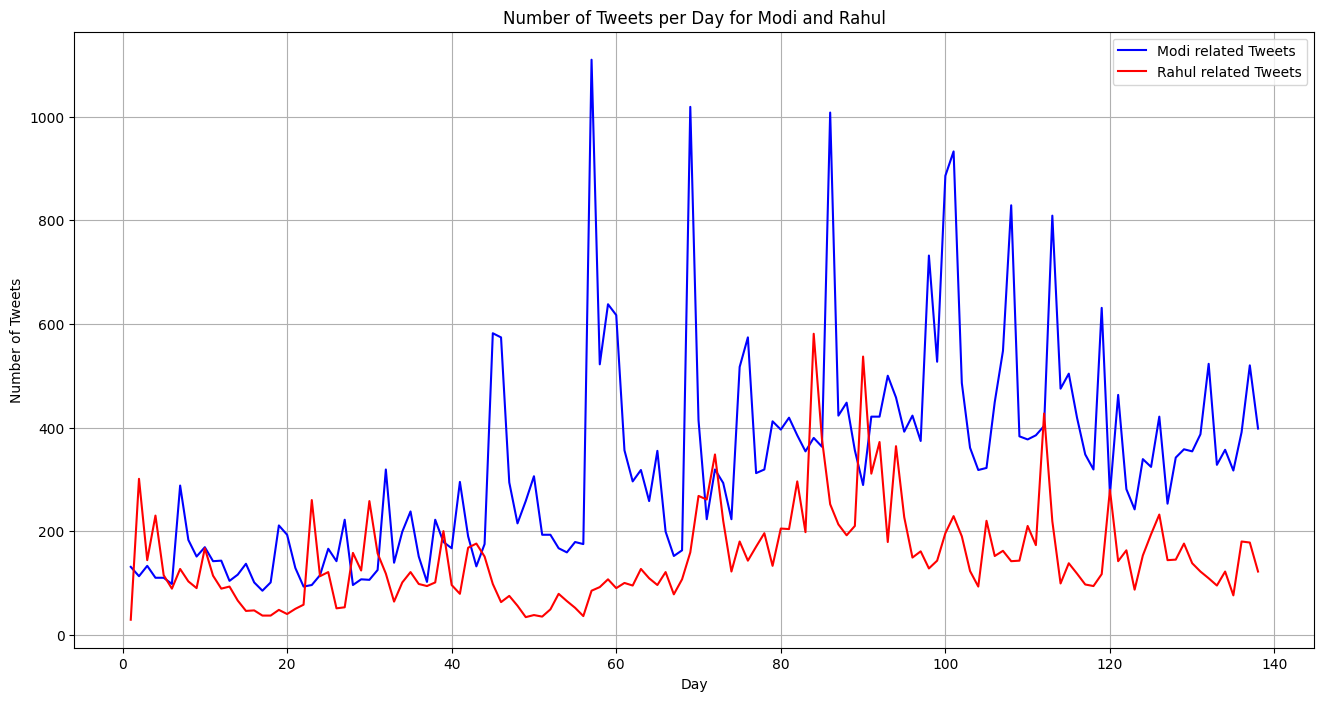

In [19]:
# Group by day and count the number of tweets for each day
modi_tweets_per_day = modi_df.groupby('day').size()
rahul_tweets_per_day = rahul_df.groupby('day').size()

# Plotting the number of tweets per day
plt.figure(figsize=(16, 8))

plt.plot(modi_tweets_per_day.index, modi_tweets_per_day.values, label='Modi related Tweets', color='blue')
plt.plot(rahul_tweets_per_day.index, rahul_tweets_per_day.values, label='Rahul related Tweets', color='red')

plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day for Modi and Rahul')
plt.legend()
plt.grid(True)
plt.show()

## Considered Those days as events where the tweets are more than 90% of the days

In [20]:
def find_events(data):
    Q3 = data.quantile(0.9)
    list_for_events = []
    list_for_tweets = []
    for date, count in data.items():
        if count > Q3:
            list_for_tweets.append(count)
            list_for_events.append(date)
    return list_for_tweets,list_for_events

tweets_in_event_days,event_days=find_events(tweets_per_day)
print(f'Event from the hole data: {event_days}')

Event from the hole data: [69, 81, 84, 85, 86, 92, 98, 100, 101, 107, 108, 112, 113, 119]


## Pre-Processing the Text

In [21]:
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove the '#' symbol from hashtags
    tweet = re.sub(r'#', '', tweet)
    # Remove punctuation (optional)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Apply preprocessing to each tweet
modi_df['cleaned_tweet'] = modi_df['Tweet'].apply(preprocess_tweet)
rahul_df['cleaned_tweet'] = rahul_df['Tweet'].apply(preprocess_tweet)

<ipython-input-21-4b7b59230f3a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['cleaned_tweet'] = modi_df['Tweet'].apply(preprocess_tweet)
<ipython-input-21-4b7b59230f3a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['cleaned_tweet'] = rahul_df['Tweet'].apply(preprocess_tweet)


In [22]:
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45751 entries, 65719 to 0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   User           45751 non-null  object             
 1   Tweet          45751 non-null  object             
 2   date           45751 non-null  datetime64[ns, UTC]
 3   day            45751 non-null  int64              
 4   week           45751 non-null  int64              
 5   cleaned_tweet  45751 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 2.4+ MB


### Optional

In [23]:
# !pip install transformers
# !pip install torch
# !pip install pandas
# !pip install requests

## Importing All the files for ROBERTA pre trained sentiment analyser

In [24]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

### Creating a Functions to get sentiments on the hole data set

In [45]:
# Define a function to get sentiment
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result['label'], result['score']

# Group by day and calculate the average sentiment score
def sentiment_score(label):
    if label == 'POSITIVE':
        return 1
    elif label == 'NEGATIVE':
        return -1
    else:
        return 0

In [26]:
modi_df[['sentiment', 'confidence']] = modi_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
modi_df['sentiment_score'] = modi_df['sentiment'].apply(sentiment_score)

<ipython-input-26-5118c0ead2c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df[['sentiment', 'confidence']] = modi_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
<ipython-input-26-5118c0ead2c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df[['sentiment', 'confidence']] = modi_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
<ipython-input-26-5118c0ead2c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [27]:
rahul_df[['sentiment', 'confidence']] = rahul_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
rahul_df['sentiment_score'] = rahul_df['sentiment'].apply(sentiment_score)

<ipython-input-27-549b99f035b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df[['sentiment', 'confidence']] = rahul_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
<ipython-input-27-549b99f035b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df[['sentiment', 'confidence']] = rahul_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
<ipython-input-27-549b99f035b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [46]:
# Again running the sentiment_score function though the labels are in all capital
modi_df['sentiment_score'] = modi_df['sentiment'].apply(sentiment_score)
rahul_df['sentiment_score'] = rahul_df['sentiment'].apply(sentiment_score)

<ipython-input-46-a444e54c84d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['sentiment_score'] = modi_df['sentiment'].apply(sentiment_score)
<ipython-input-46-a444e54c84d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['sentiment_score'] = rahul_df['sentiment'].apply(sentiment_score)


### Download the output data frame files for Modi and Rahul
Data will be helpful in later calculations

In [48]:
modi_df.to_csv('modi_sentiment_output.csv',index=False)

In [49]:
rahul_df.to_csv('rahul_sentiment_output.csv',index=False)

In [50]:
import os
print(os.getcwd())  # This will print the current working directory
print(os.listdir('/content/'))  # This will list all files in the /content/ directory


/content
['.config', 'rahul_sentiment_output.csv', 'drive', 'modi_sentiment_output.csv', 'sample_data']


In [51]:
from google.colab import files

files.download('modi_sentiment_output.csv')
files.download('rahul_sentiment_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analyzing Data Frame for Tweets related to Modi and Rahul
Before and After Each event

In [54]:
#assume k=3
k=2

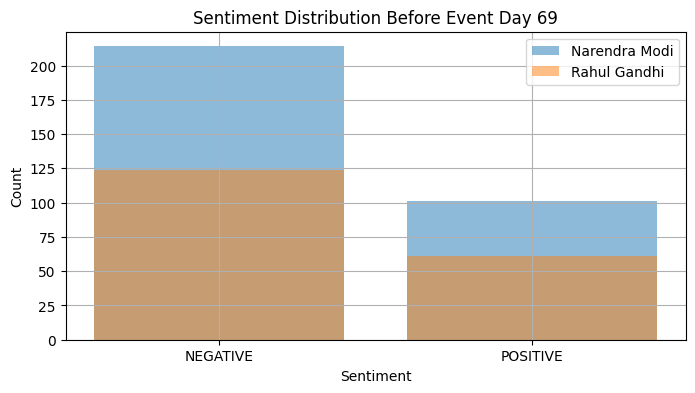

<Figure size 640x480 with 0 Axes>

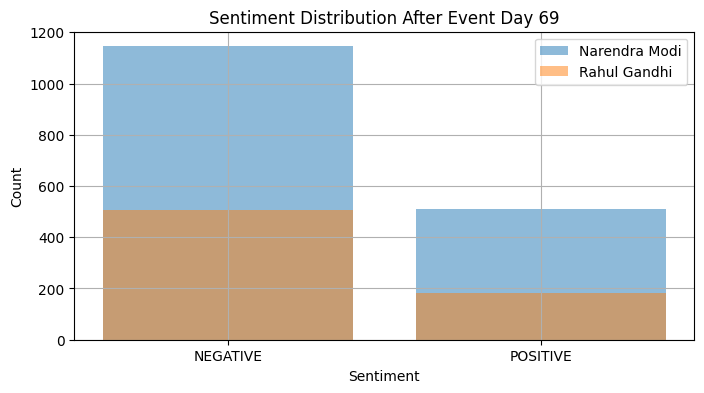

<Figure size 640x480 with 0 Axes>

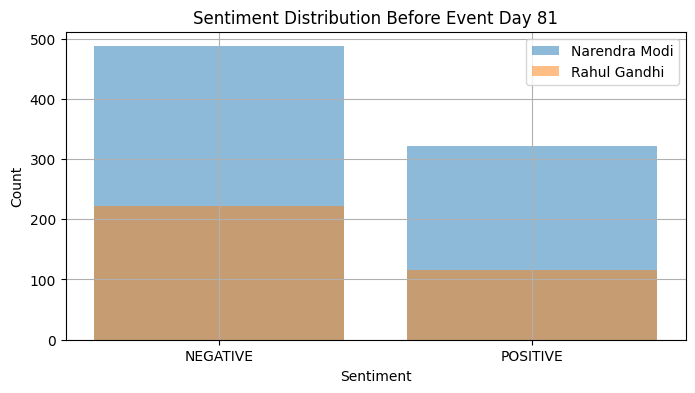

<Figure size 640x480 with 0 Axes>

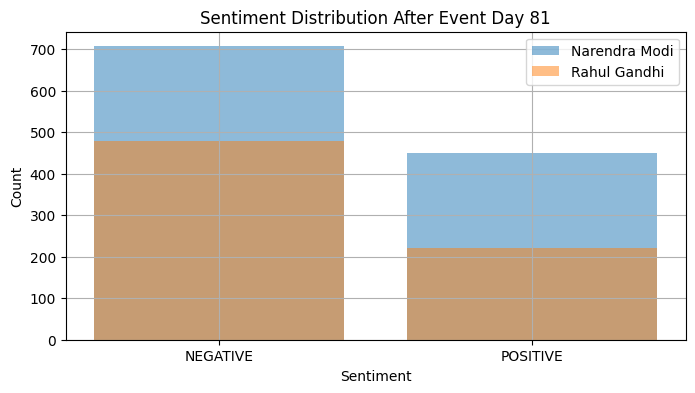

<Figure size 640x480 with 0 Axes>

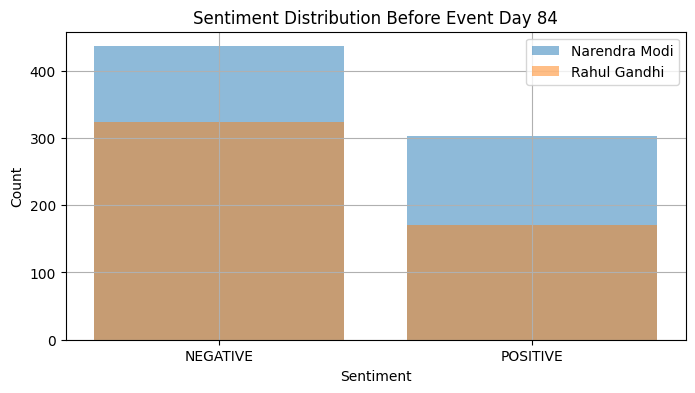

<Figure size 640x480 with 0 Axes>

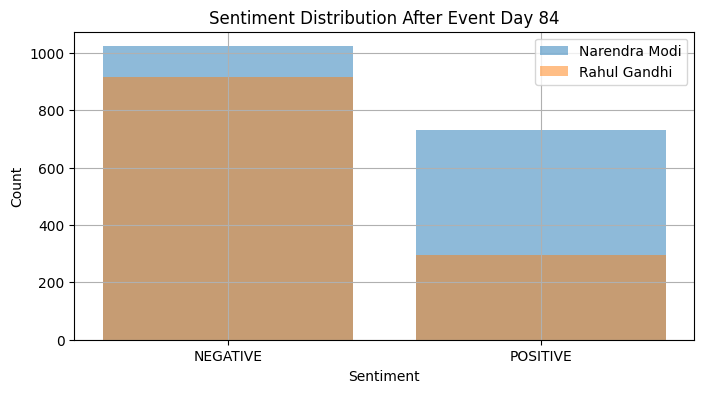

<Figure size 640x480 with 0 Axes>

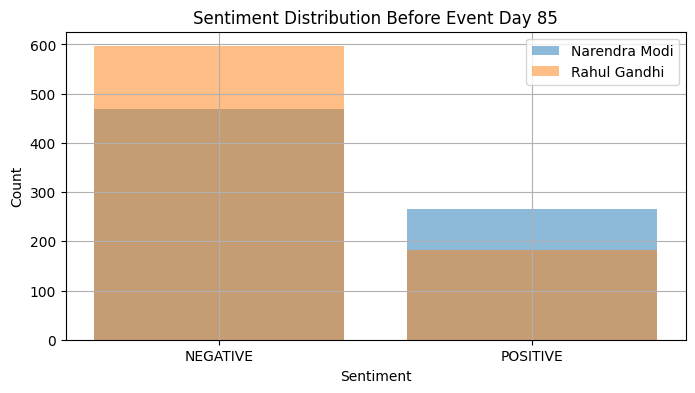

<Figure size 640x480 with 0 Axes>

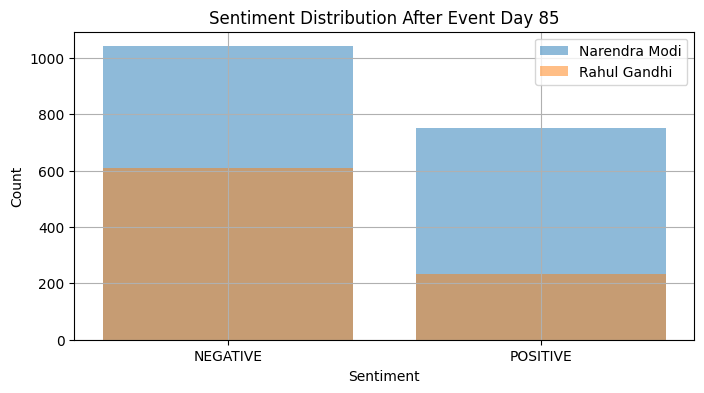

<Figure size 640x480 with 0 Axes>

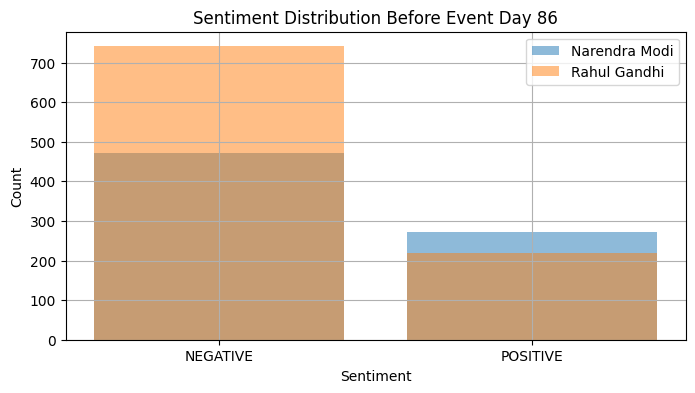

<Figure size 640x480 with 0 Axes>

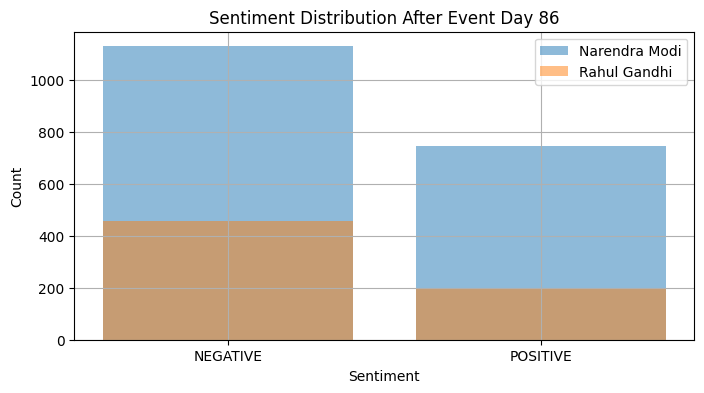

<Figure size 640x480 with 0 Axes>

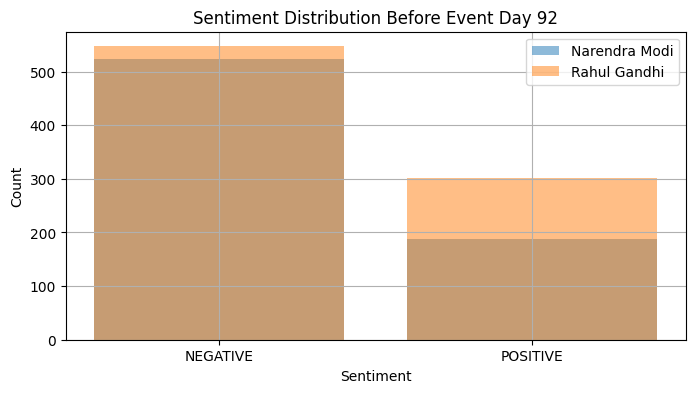

<Figure size 640x480 with 0 Axes>

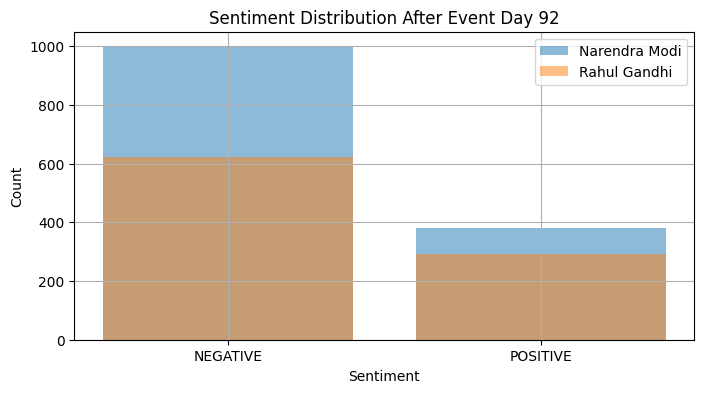

<Figure size 640x480 with 0 Axes>

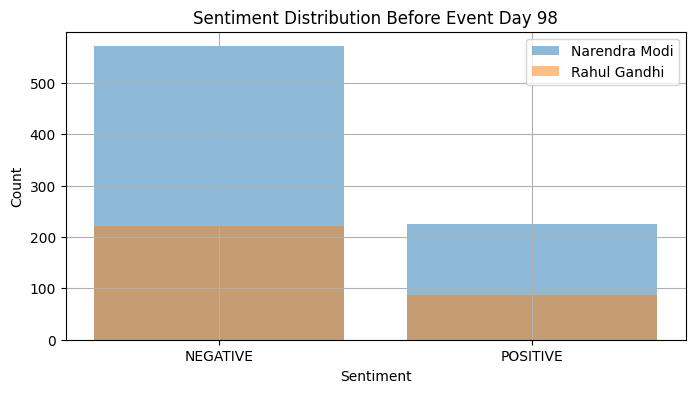

<Figure size 640x480 with 0 Axes>

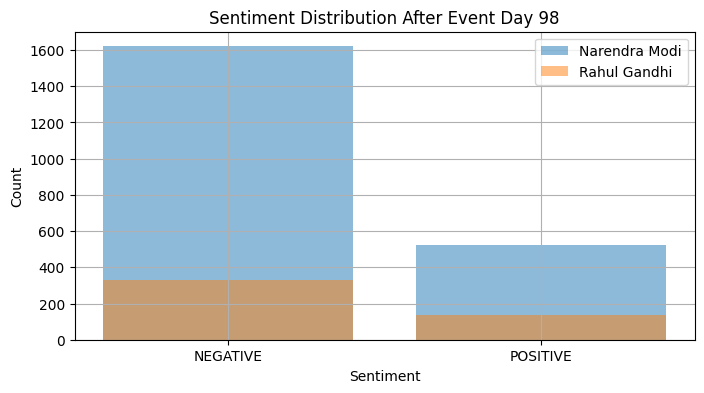

<Figure size 640x480 with 0 Axes>

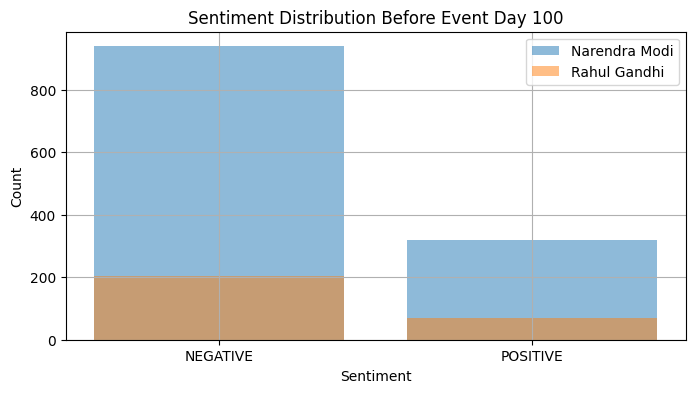

<Figure size 640x480 with 0 Axes>

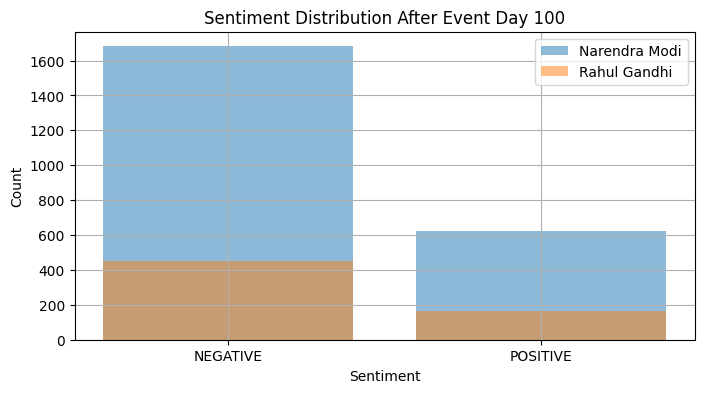

<Figure size 640x480 with 0 Axes>

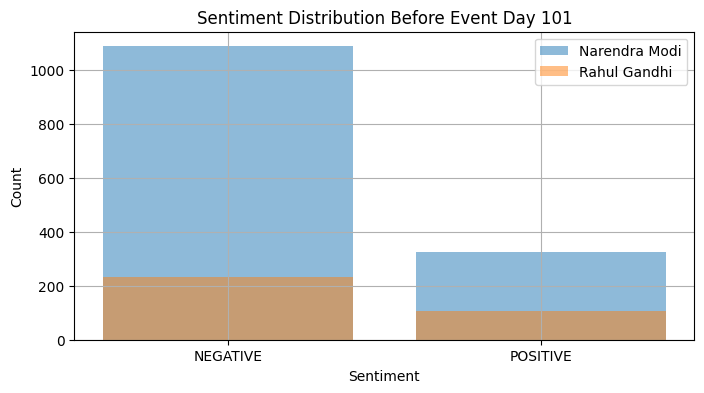

<Figure size 640x480 with 0 Axes>

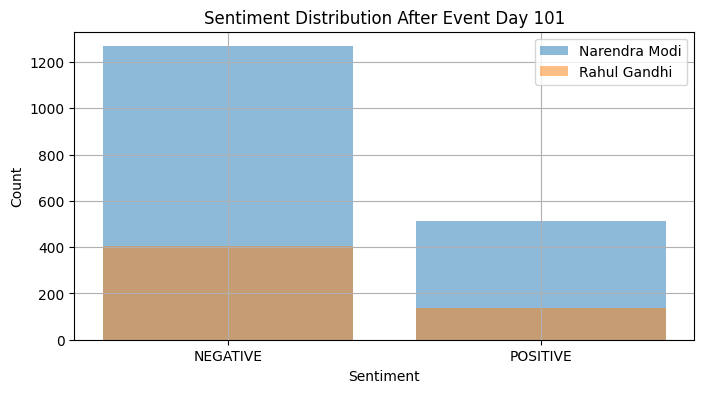

<Figure size 640x480 with 0 Axes>

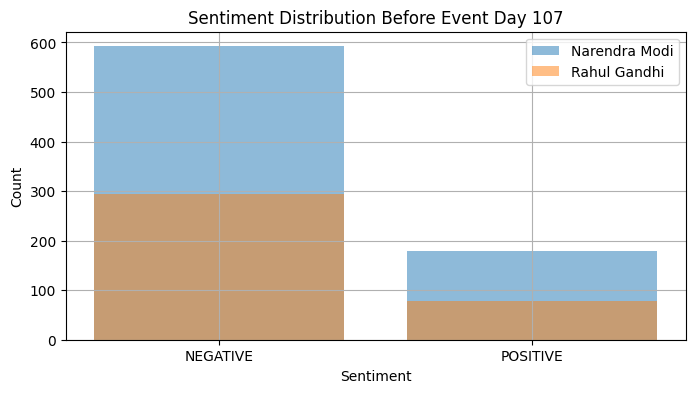

<Figure size 640x480 with 0 Axes>

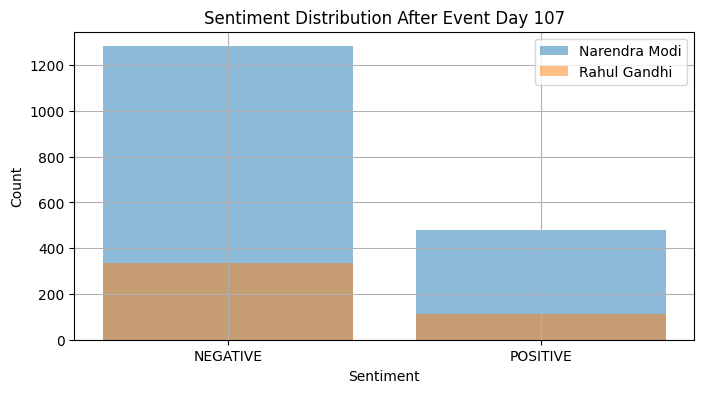

<Figure size 640x480 with 0 Axes>

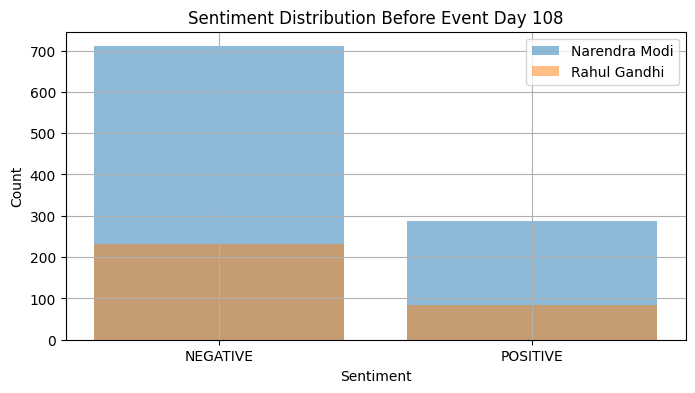

<Figure size 640x480 with 0 Axes>

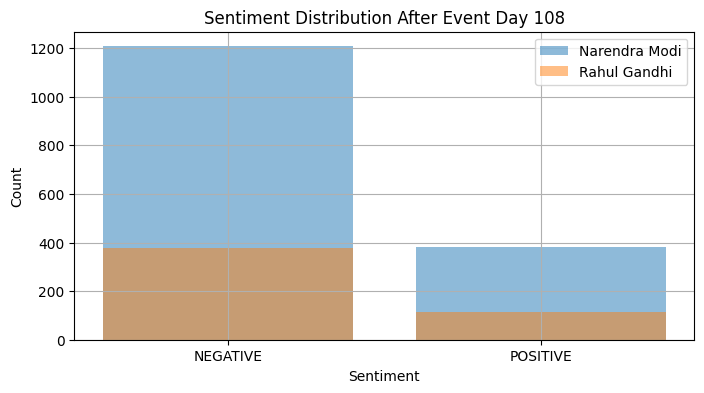

<Figure size 640x480 with 0 Axes>

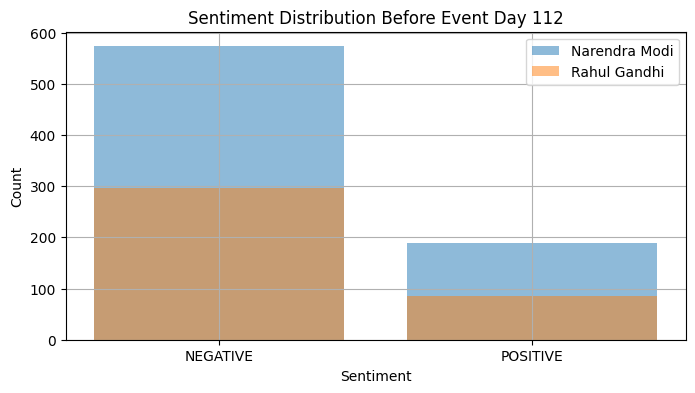

<Figure size 640x480 with 0 Axes>

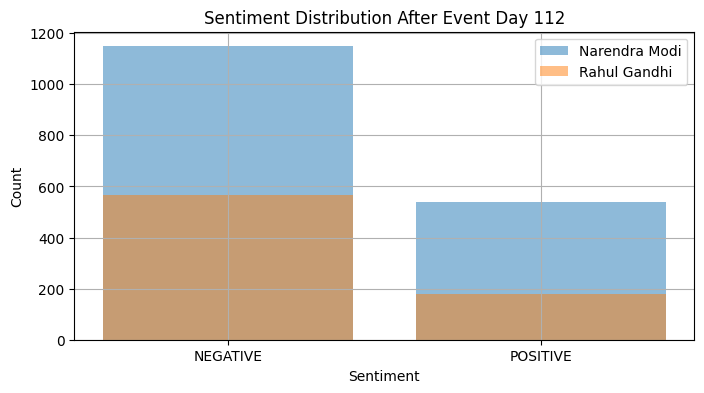

<Figure size 640x480 with 0 Axes>

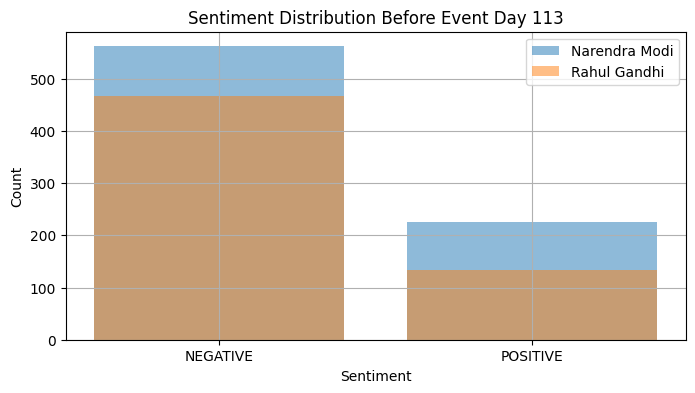

<Figure size 640x480 with 0 Axes>

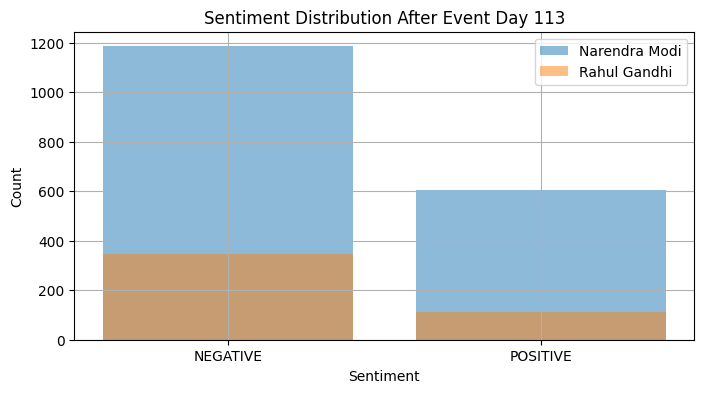

<Figure size 640x480 with 0 Axes>

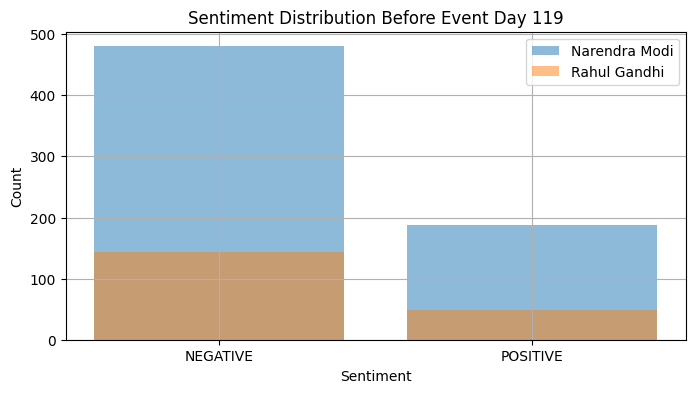

<Figure size 640x480 with 0 Axes>

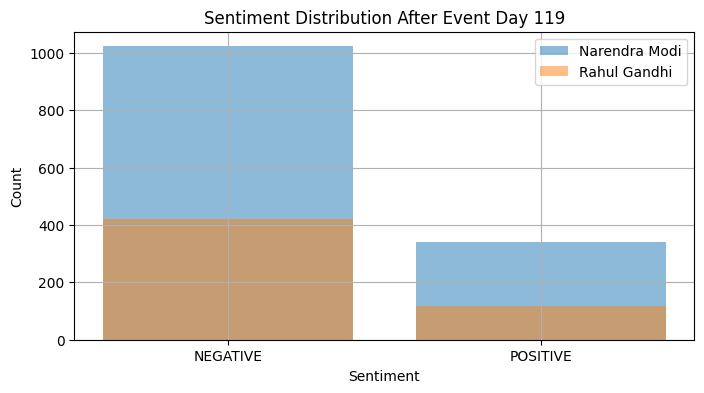

<Figure size 640x480 with 0 Axes>

In [55]:

# Function to filter and plot sentiment around event days
def filter_and_plot_sentiments(modi_df, rahul_df, event_days, k):
    count=0
    for event_day in event_days:
        start_day = max(1, event_day - k)
        end_day = min(max(df['day']),event_day + k)# here including the event day

        # Filter before event
        modi_before_df = modi_df[(modi_df['day'] >= start_day) & (modi_df['day'] < event_day)]
        rahul_before_df = rahul_df[(rahul_df['day'] >= start_day) & (rahul_df['day'] < event_day)]

        # Filter after event
        modi_after_df = modi_df[(modi_df['day'] >= event_day) & (modi_df['day'] <= end_day)]
        rahul_after_df = rahul_df[(rahul_df['day'] >= event_day) & (rahul_df['day'] <= end_day)]

        # Get sentiment counts
        modi_before_counts = modi_before_df['sentiment'].value_counts()
        rahul_before_counts = rahul_before_df['sentiment'].value_counts()

        modi_after_counts = modi_after_df['sentiment'].value_counts()
        rahul_after_counts = rahul_after_df['sentiment'].value_counts()

        # Plot sentiments before the event
        plt.figure(figsize=(8, 4))
        plt.bar(modi_before_counts.index, modi_before_counts.values, alpha=0.5, label='Narendra Modi')
        plt.bar(rahul_before_counts.index, rahul_before_counts.values, alpha=0.5, label='Rahul Gandhi')
        plt.title(f'Sentiment Distribution Before Event Day {event_day}')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        before_plot='before_plot '+str(count)
        plt.savefig(f'/content/drive/My Drive/{before_plot}.png')

        # Plot sentiments after the event
        plt.figure(figsize=(8, 4))
        plt.bar(modi_after_counts.index, modi_after_counts.values, alpha=0.5, label='Narendra Modi')
        plt.bar(rahul_after_counts.index, rahul_after_counts.values, alpha=0.5, label='Rahul Gandhi')
        plt.title(f'Sentiment Distribution After Event Day {event_day}')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        after_plot='after_plot '+str(count)
        plt.savefig(f'/content/drive/My Drive/{after_plot}.png')

        count+=1

# Plot sentiments for both Modi and Rahul
filter_and_plot_sentiments(modi_df, rahul_df, event_days, k)

## Checking overall Sentiments

In [56]:
# Assuming 'sentiment' column contains the sentiment labels
rahul_sentiments = rahul_df['sentiment'].value_counts()
rahul_sentiments

sentiment
NEGATIVE    14912
POSITIVE     5657
Name: count, dtype: int64

In [57]:
modi_sentiments = modi_df['sentiment'].value_counts()
modi_sentiments

sentiment
NEGATIVE    31777
POSITIVE    13974
Name: count, dtype: int64

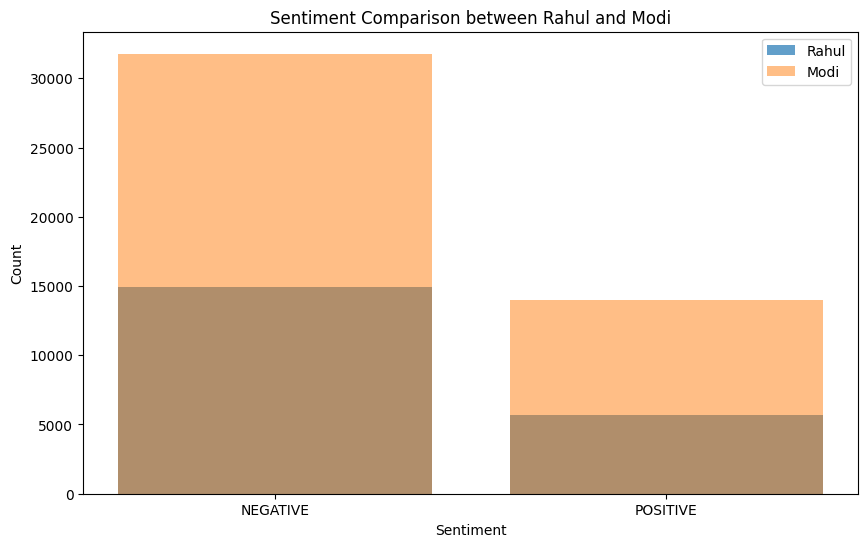

In [59]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(rahul_sentiments.index, rahul_sentiments.values, alpha=0.7, label='Rahul')
plt.bar(modi_sentiments.index, modi_sentiments.values, alpha=0.5, label='Modi')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Comparison between Rahul and Modi')
plt.legend()
plt.show()

## Checking overall Popularity

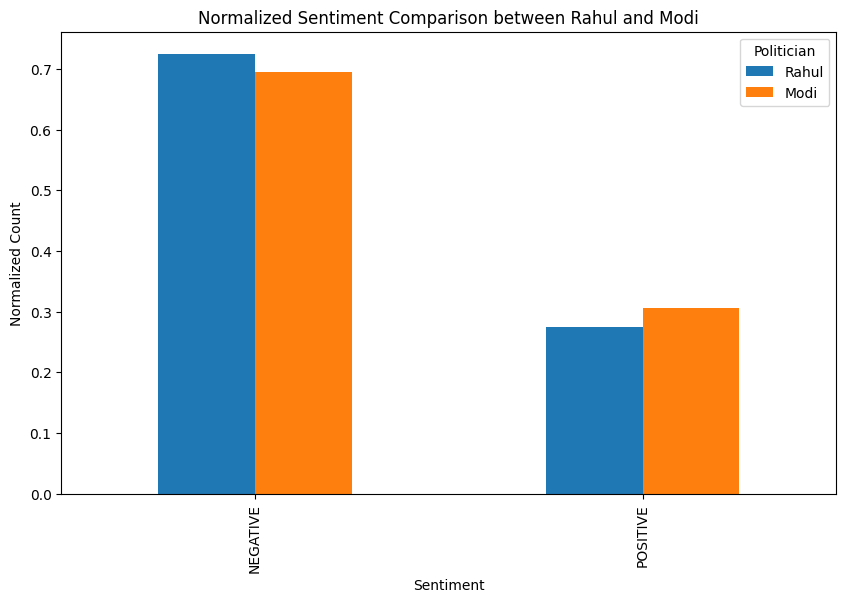

In [60]:
rahul_sentiments = rahul_df['sentiment'].value_counts(normalize=True)
modi_sentiments = modi_df['sentiment'].value_counts(normalize=True)

# Combining the sentiments into a single DataFrame for easy plotting
combined_df = pd.DataFrame({'Rahul': rahul_sentiments, 'Modi': modi_sentiments})

# Plotting the sentiment comparison
combined_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sentiment')
plt.ylabel('Normalized Count')
plt.title('Normalized Sentiment Comparison between Rahul and Modi')
plt.legend(title='Politician')
plt.show()